## Import Packages

In [115]:
import pandas as pd
import numpy as np 
import time
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [116]:
df = pd.read_csv('ecom data.csv', encoding = 'unicode_escape')
print(df.shape)
df.sample(5)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
185456,552817,22584,PACK OF 6 PANNETONE GIFT BOXES,6,5/11/2011 12:47,2.55,13136.0,United Kingdom
363278,C568557,22301,COFFEE MUG CAT + BIRD DESIGN,-4,9/27/2011 15:48,2.55,12681.0,France
427001,573373,22652,TRAVEL SEWING KIT,1,10/30/2011 13:37,1.65,14684.0,United Kingdom
307643,563924,21363,HOME SMALL WOOD LETTERS,1,8/21/2011 14:32,4.95,15984.0,United Kingdom
220507,556197,22868,NUMBER TILE COTTAGE GARDEN 0,8,6/9/2011 12:27,1.95,18065.0,United Kingdom


## Quick Summary of Data

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 22.7+ MB


### Getting rows where Customer ID is not null

In [118]:
df = df[df['CustomerID'].notna()]

# Data Preprocessing

#### Order_month column. Creating a new column that takes the month of order based oninvoice date column

In [119]:
df['OrderMonth'] = pd.to_datetime(df['InvoiceDate']).to_numpy().astype('datetime64[M]')

In [120]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderMonth
149969,549316,22723,SET OF 6 HERB TINS SKETCHBOOK,4,4/8/2011 9:54,3.95,12705.0,Germany,2011-04-01
440830,574547,21132,SILVER STANDING GNOME,1,11/4/2011 15:08,4.25,17841.0,United Kingdom,2011-11-01
309764,564140,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,8/23/2011 11:47,0.42,12621.0,Germany,2011-08-01
309638,564135,23307,SET OF 60 PANTRY DESIGN CAKE CASES,12,8/23/2011 11:12,0.55,16550.0,United Kingdom,2011-08-01
241117,558183,84631,FRUIT TREE AND BIRDS WALL PLAQUE,2,6/27/2011 12:13,7.95,15996.0,United Kingdom,2011-06-01


### Getting the first order of each customer (joined_month). Their first purchase is assumed to be when they official joined the platform

In [122]:
df['JoinedMonth'] = df['OrderMonth'].groupby(df['CustomerID']).transform('min')

In [123]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderMonth,JoinedMonth
42607,540014,85176,SEWING SUSAN 21 NEEDLE SET,1,1/4/2011 11:34,0.85,14606.0,United Kingdom,2011-01-01,2010-12-01
286680,562034,23342,MINT DINER WALL CLOCK,2,8/2/2011 9:14,8.50,12449.0,Belgium,2011-08-01,2011-06-01
56232,541094,21174,POTTERING IN THE SHED METAL SIGN,2,1/13/2011 13:36,1.95,13246.0,United Kingdom,2011-01-01,2011-01-01
150309,549425,84378,SET OF 3 HEART COOKIE CUTTERS,1,4/8/2011 11:54,1.25,14030.0,United Kingdom,2011-04-01,2010-12-01
401290,571433,23534,STOP FOR TEA WALL ART,3,10/17/2011 13:19,5.95,13015.0,United Kingdom,2011-10-01,2011-04-01


In [86]:
#first_order_date_df = df.sort_values(by="Order_month").drop_duplicates(subset=["CustomerID"], keep="first")
#first_order_date_df.rename({'Order_month': 'Joined_month'}, axis=1, inplace=True)

### Getting the Tenure/Age of each order by subtracting order date and first order date 

In [124]:
df['Age'] = df['OrderMonth'].dt.to_period('M').astype(int) - df['JoinedMonth'].dt.to_period('M').astype(int)
df['OrderMonth'] = df['OrderMonth'].astype('str')

In [125]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderMonth,JoinedMonth,Age
284965,561894,21624,VINTAGE UNION JACK DOORSTOP,1,7/31/2011 15:00,5.95,14456.0,United Kingdom,2011-07-01,2011-07-01,0
389849,570488,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,2,10/10/2011 17:12,5.79,14096.0,United Kingdom,2011-10-01,2011-08-01,2
522972,580490,21705,BAG 500g SWIRLY MARBLES,48,12/4/2011 12:48,0.39,15773.0,United Kingdom,2011-12-01,2011-12-01,0
517668,580073,84596B,SMALL DOLLY MIX DESIGN ORANGE BOWL,8,12/1/2011 14:03,0.42,16813.0,United Kingdom,2011-12-01,2011-05-01,7
524061,580527,22072,RED RETROSPOT TEA CUP AND SAUCER,2,12/4/2011 15:19,1.25,13736.0,United Kingdom,2011-12-01,2011-03-01,9


<AxesSubplot:xlabel='Age', ylabel='count'>

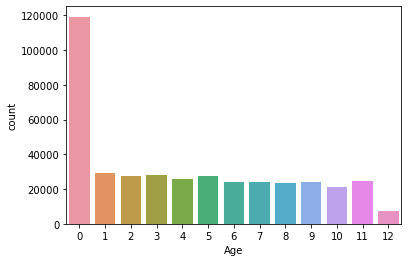

In [128]:
sns.countplot(x="Age", data = df)

<AxesSubplot:xlabel='JoinedMonth', ylabel='count'>

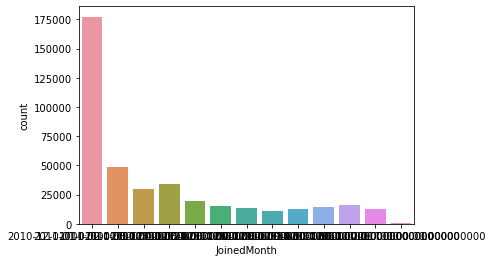

In [127]:
sns.countplot(x="JoinedMonth", data = df)

### Getting the number of new joinrs for each month

In [129]:
first_mth_cohort_size_df = df.groupby('JoinedMonth')['CustomerID'].nunique().reset_index().rename(columns={'CustomerID':'FirstMonth_CohortSize'})

In [130]:
first_mth_cohort_size_df

,JoinedMonth,FirstMonth_CohortSize
0,2010-12-01,948
1,2011-01-01,421
2,2011-02-01,380
3,2011-03-01,440
4,2011-04-01,299
5,2011-05-01,279
6,2011-06-01,235
7,2011-07-01,191
8,2011-08-01,167
9,2011-09-01,298


### Getting the number of customers who made a purchase in the folloinwg months

In [131]:
mthly_cohort_size_df = df.groupby(['JoinedMonth', 'Age'])['CustomerID'].nunique().reset_index().rename(columns={'CustomerID':'Monthly_cohort_size'})

In [132]:
mthly_cohort_size_df

,JoinedMonth,Age,Monthly_cohort_size
0,2010-12-01,0,948
1,2010-12-01,1,362
2,2010-12-01,2,317
3,2010-12-01,3,367
4,2010-12-01,4,341
...,...,...,...
86,2011-10-01,1,93
87,2011-10-01,2,46
88,2011-11-01,0,321
89,2011-11-01,1,43


In [134]:
final_df = pd.merge(mthly_cohort_size_df, first_mth_cohort_size_df, how="left", on=["JoinedMonth", "JoinedMonth"])

In [135]:
final_df = final_df.rename(columns={'FirstMonth_CohortSize': 'Cohort_size'})

In [136]:
final_df['Monthly_cohort_size_pct'] = (final_df['Monthly_cohort_size'] / final_df['Cohort_size'] * 100).round(1)

In [137]:
final_df

,JoinedMonth,Age,Monthly_cohort_size,Cohort_size,Monthly_cohort_size_pct
0,2010-12-01,0,948,948,100.0
1,2010-12-01,1,362,948,38.2
2,2010-12-01,2,317,948,33.4
3,2010-12-01,3,367,948,38.7
4,2010-12-01,4,341,948,36.0
...,...,...,...,...,...
86,2011-10-01,1,93,352,26.4
87,2011-10-01,2,46,352,13.1
88,2011-11-01,0,321,321,100.0
89,2011-11-01,1,43,321,13.4


In [139]:
final_df_raw = pd.pivot(final_df, index=['JoinedMonth', 'Cohort_size'], columns=['Age'], values='Monthly_cohort_size')

In [140]:
final_df_pct = pd.pivot(final_df, index=['JoinedMonth', 'Cohort_size'], columns=['Age'], values='Monthly_cohort_size_pct')

In [141]:
final_df

,JoinedMonth,Age,Monthly_cohort_size,Cohort_size,Monthly_cohort_size_pct
0,2010-12-01,0,948,948,100.0
1,2010-12-01,1,362,948,38.2
2,2010-12-01,2,317,948,33.4
3,2010-12-01,3,367,948,38.7
4,2010-12-01,4,341,948,36.0
...,...,...,...,...,...
86,2011-10-01,1,93,352,26.4
87,2011-10-01,2,46,352,13.1
88,2011-11-01,0,321,321,100.0
89,2011-11-01,1,43,321,13.4


In [142]:
final_df_pct

,Age,0,1,2,3,4,5,6,7,8,9,10,11,12
JoinedMonth,Cohort_size,,,,,,,,,,,,,
2010-12-01,948,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,421,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,380,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,440,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,299,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,279,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,235,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 69.0, 'Age (in months)')

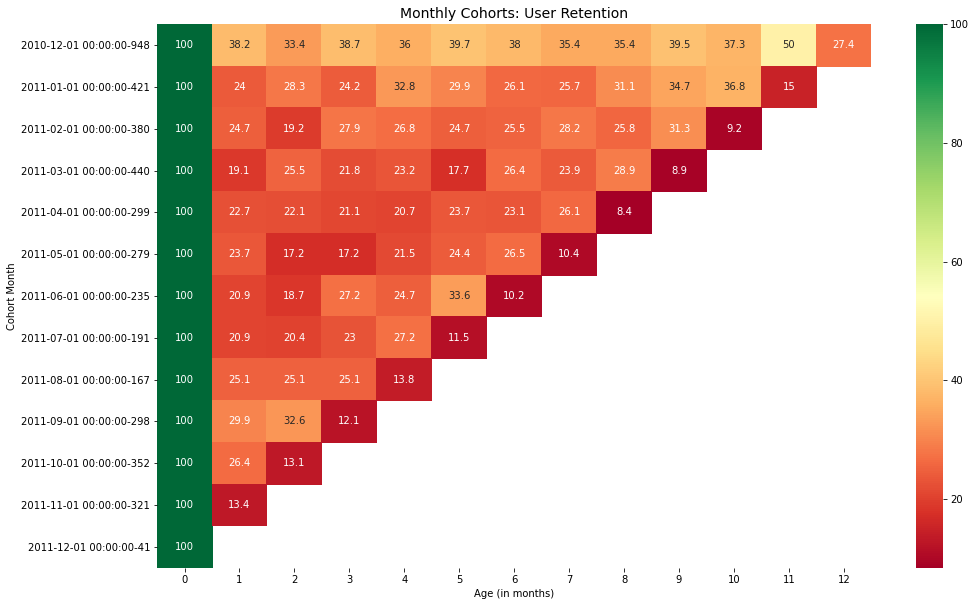

In [143]:
plt.figure(figsize=(16, 10))
sns.heatmap(final_df_pct, annot=True,cmap="RdYlGn", fmt='g')
plt.title('Monthly Cohorts: User Retention', fontsize = 14)
plt.ylabel('Cohort Month')
plt.xlabel('Age (in months)')